<a href="https://colab.research.google.com/github/catastropiyush/course_notes/blob/main/Rdkit_cheminformatics_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 30.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [9]:
import pandas as pd

smiles_list = [
    'CC(=O)OC1=CC=CC=C1',  # Aspirin-like structure
    'C1=CC=C(C=C1)CCN',    # Phenethylamine structure
    'CC1=CC=C(C=C1)O',     # p-Cresol
    'C1=CC=C(C(=C1)O)O',   # Hydroquinone
    'CC(=O)CCCN',          # 5-Aminopentan-2-one
    'COC1=CC=CC=C1CC=O',   # 2-(2-methoxyphenyl)acetaldehyde
    'CC1=CC=CC=C1N',       # o-Toluidine
    'C1=CC=C(C=C1)C(=O)O', # Benzoic acid
    'CCOC(=O)CC'           # Ethyl propionate
]

df = pd.DataFrame(smiles_list, columns=['smiles'])

In [10]:
df

,smiles
0,CC(=O)OC1=CC=CC=C1
1,C1=CC=C(C=C1)CCN
2,CC1=CC=C(C=C1)O
3,C1=CC=C(C(=C1)O)O
4,CC(=O)CCCN
5,COC1=CC=CC=C1CC=O
6,CC1=CC=CC=C1N
7,C1=CC=C(C=C1)C(=O)O
8,CCOC(=O)CC


In [11]:
PandasTools.AddMoleculeColumnToFrame(df,'smiles','mol')

Failed to patch pandas - unable to change molecule rendering


In [12]:
df

,smiles,mol
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98d60>
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98dd0>
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98e40>
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98eb0>
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98f20>
5,COC1=CC=CC=C1CC=O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98f90>
6,CC1=CC=CC=C1N,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb99000>
7,C1=CC=C(C=C1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb99070>
8,CCOC(=O)CC,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb990e0>


In [13]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit import Chem

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 300, 300
rdDepictor.SetPreferCoordGen(True)

In [14]:
# define a text buffer for our examples
examples = """C(C)(C)O isopropanol
C(Cl)(Cl)(Cl)Cl carbon tetrachloride
CC(=O)O acetic acid"""
# not that we use the second argumen to split to only return two tokens
smiles_list = [x.split(" ",1) for x in examples.split("\n")]

In [20]:
smiles_list = df['smiles'].tolist()

In [23]:
smiles_list

['CC(=O)OC1=CC=CC=C1',
 'C1=CC=C(C=C1)CCN',
 'CC1=CC=C(C=C1)O',
 'C1=CC=C(C(=C1)O)O',
 'CC(=O)CCCN',
 'COC1=CC=CC=C1CC=O',
 'CC1=CC=CC=C1N',
 'C1=CC=C(C=C1)C(=O)O',
 'CCOC(=O)CC']

In [26]:
from rdkit.Chem.Draw import MolsToGridImage

def display_structures(smiles_list):
    mol_list = []
    for smiles in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
    return MolsToGridImage(mol_list,molsPerRow=5)

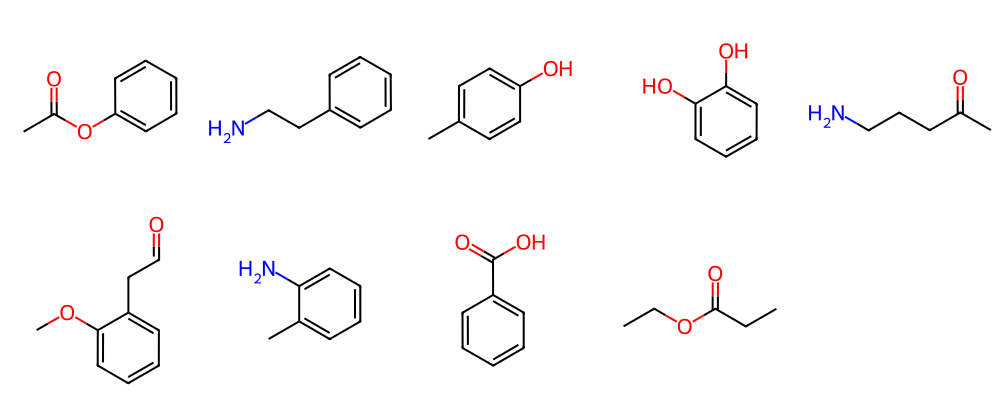

In [27]:
display_structures(smiles_list)

#Fingerprinting and Molecular Similarity

The most straightforward and consistent way to get fingerprints is to create a FingeprintGenerator object for your fingerprint type of interest and then use that to calculate fingerprints. Fingerprint generators provide a consistent interface to all the supported fingerprinting methods and allow easy generation of fingerprints as:

    bit vectors : fpgen.GetFingerprint

    sparse (unfolded) bit vectors : fpgen.GetSparseFingerprint

    count vectors : fpgen.GetCountFingerprint

    sparse (unfolded) count vectors : fpgen.GetSparseCountFingerprint


In [28]:
df_maccs = []
for mol in df['mol']:
  maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)  # generate bitvector object
  arr = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(maccs_bitvector,arr) # convert the RDKit explicit vectors into numpy arrays

  df_maccs.append(arr)
MACCS = pd.concat([df, pd.DataFrame(df_maccs)], axis=1)

In [29]:
MACCS.head()

,smiles,mol,0,1,2,3,4,5,6,7,...,157,158,159,160,161,162,163,164,165,166
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98d60>,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98dd0>,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98e40>,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,1,0
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98eb0>,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98f20>,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0


##RDKit (Topological) Fingerprints

In [ ]:
from rdkit import DataStructs

##Morgan Fingerprint


In [32]:
df_mf = []
for mol in df['mol']:
  mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=1, nBits = 1024)
  arr = np.zeros((0,), dtype=np.int8)
  # convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(mf_bitvector,arr)
  df_mf.append(arr)

MF = pd.concat([df, pd.DataFrame(df_mf)], axis=1)

In [33]:
MF.head()

,smiles,mol,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98d60>,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98dd0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98e40>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98eb0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98f20>,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


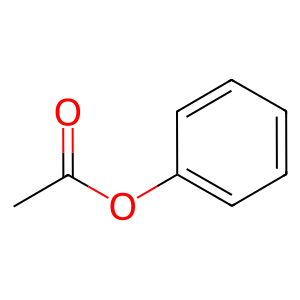

Number of ones: 13
Number of zeros: 1011


In [35]:
display(MF.iloc[0,1])
molecule = MF.iloc[0,2:]
num_ones = np.sum(molecule)
num_zeros = len(molecule) - num_ones
print("Number of ones:", num_ones)
print("Number of zeros:", num_zeros)

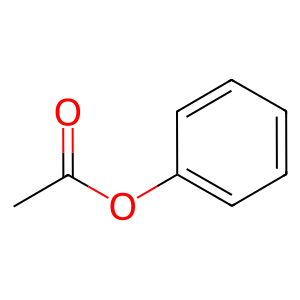

No of ones:  13
No of zeros:  1011 

11      1
33      1
64      1
322     1
356     1
650     1
695     1
705     1
726     1
807     1
849     1
893     1
1017    1
Name: 0, dtype: object


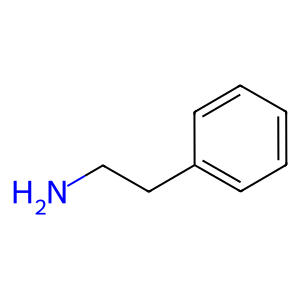

No of ones:  10
No of zeros:  1014 

64     1
80     1
147    1
219    1
356    1
726    1
730    1
816    1
849    1
981    1
Name: 1, dtype: object


In [37]:
# print first molecule in the dataset
display(MF.iloc[0,1])
nmpyrrole = MF.iloc[0,2:]

print(f'No of ones:  {nmpyrrole[nmpyrrole==1].count()}')
print(f'No of zeros:  {nmpyrrole[nmpyrrole==0].count()} \n')

print(nmpyrrole[nmpyrrole==1])

# print second molecule in the dataset
display(MF.iloc[1,1])
pyrrole = MF.iloc[1,2:]

print(f'No of ones:  {nmpyrrole[pyrrole==1].count()}')
print(f'No of zeros:  {nmpyrrole[pyrrole==0].count()} \n')

print(pyrrole[pyrrole==1])


Atom Pair Fingerprint


In [38]:
# create an empty list
df_apf = []

# run a for loop to iterate through each molecule
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=4096)

for mol in df['mol']:
  apf_bitvector = apgen.GetFingerprint(mol)


# convert the RDKit explicit vectors into numpy arrays
  arr = np.array(apf_bitvector)
  df_apf.append(arr)

APF = pd.concat([df, pd.DataFrame(df_apf)], axis=1)



Topological Torsion Fingerprint


In [40]:
df_ttf = []
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
for mol in df['mol']:
  ttf_bitvector = ttgen.GetFingerprint(mol)

  # convert the RDKit explicit vectors into numpy arrays
  arr = np.array(ttf_bitvector)
  df_ttf.append(arr)

TTF = pd.concat([df, pd.DataFrame(df_ttf)], axis=1)


In [41]:
TTF.head()

,smiles,mol,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98d60>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98dd0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98e40>,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98eb0>,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7edb8cb98f20>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


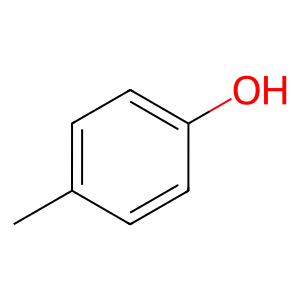

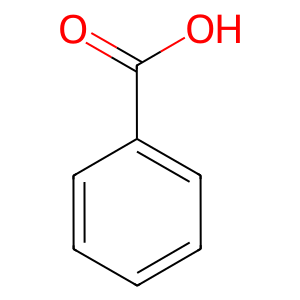

In [69]:
display(MF.iloc[2,1])
display(MF.iloc[7,1])

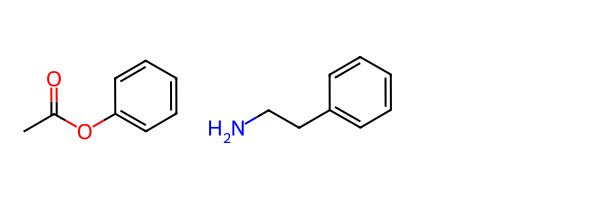

In [66]:
Draw.MolsToGridImage([my_this_mol_obj,my_that_mol_obj])

In [42]:
my_this_mol_obj = MF["mol"][0]
my_that_mol_obj = MF["mol"][1]

In [43]:
this_fp = Chem.RDKFingerprint(my_this_mol_obj,maxPath=7,fpSize=512)
that_fp = Chem.RDKFingerprint(my_that_mol_obj,maxPath=7,fpSize=512)

In [44]:
this_fp

In [45]:
this_fp.ToBitString()

'01100000001000000000000000000010000001000000100001111000010010000000010100000000000010010100000010000001000000000001000000000000010010011010100011100100010000010110000000110000000001000000000011100000000001001011001100010000000100000000110010100000100000100000010100000001000000001010100000001010010001000000000001010010100001000010000001010000001100000100000010001010000100001000000010000010000100000000000101000010110000000001000010100110101100010000000100000100000001010000011101110000000000000000011001000000'

Text(0.5, 1.0, 'that_fp')

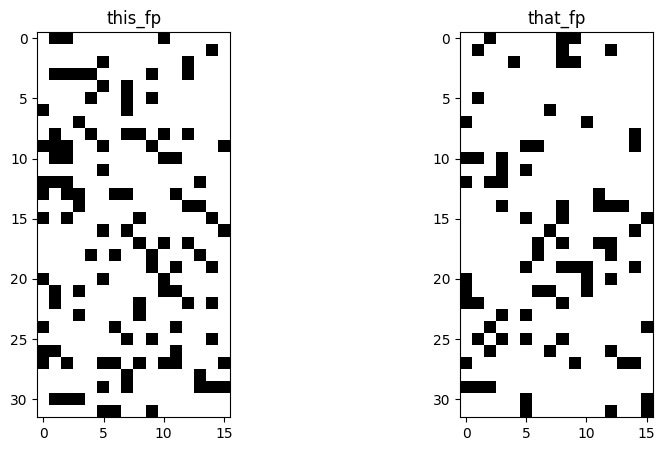

In [51]:
this_fp_array = np.array([int(bit) for bit in this_fp.ToBitString()])
that_fp_array = np.array([int(bit) for bit in that_fp.ToBitString()])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(this_fp_array.reshape(32,16), cmap='binary')
plt.title('this_fp')

plt.subplot(1, 2, 2)
plt.imshow(that_fp_array.reshape(32,16), cmap='binary')
plt.title('that_fp')

In [53]:
# Morgan FP
MFP_this = AllChem.GetMorganFingerprint(my_this_mol_obj,2)
MFP_this

In [54]:
MFP_this_bits = AllChem.GetMorganFingerprintAsBitVect(my_this_mol_obj,5,nBits=512)
MFP_this_bits

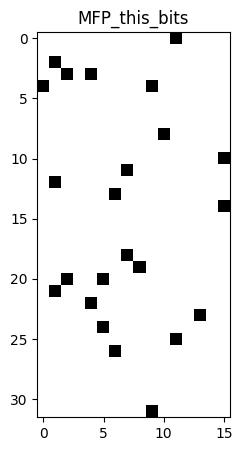

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(np.array(MFP_this_bits).reshape(32, 16), cmap='binary')
plt.title('MFP_this_bits')
plt.show()

In [56]:
DataStructs.DiceSimilarity(this_fp,this_fp)

1.0

In [57]:
DataStructs.DiceSimilarity(this_fp,that_fp)

0.2736842105263158

In [58]:
DataStructs.DiceSimilarity(this_fp,MFP_this_bits)

0.12030075187969924

##Tanimoto Similarity

In [59]:
from rdkit import DataStructs
# Tanimoto
commonBits = this_fp&that_fp
print('this:',this_fp.GetNumOnBits(),'that:',that_fp.GetNumOnBits(),'num in common:',commonBits.GetNumOnBits())
print(commonBits.GetNumOnBits()/(this_fp.GetNumOnBits()+that_fp.GetNumOnBits()-commonBits.GetNumOnBits()))
print('Tanimoto:', DataStructs.TanimotoSimilarity(this_fp,that_fp))

this: 110 that: 80 num in common: 26
0.15853658536585366
Tanimoto: 0.15853658536585366


In [60]:
from sklearn.metrics import jaccard_score

In [61]:
jaccard_score(np.array(this_fp),np.array(that_fp))

0.15853658536585366

## Molecular similarity visualization


In [63]:
from rdkit.Chem.Draw import SimilarityMaps

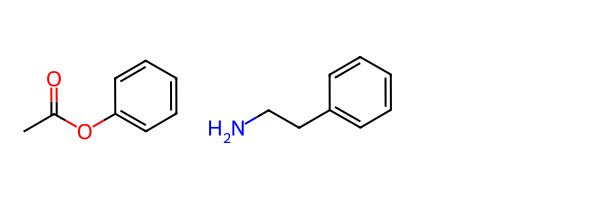

In [65]:
Draw.MolsToGridImage([my_this_mol_obj,my_that_mol_obj])

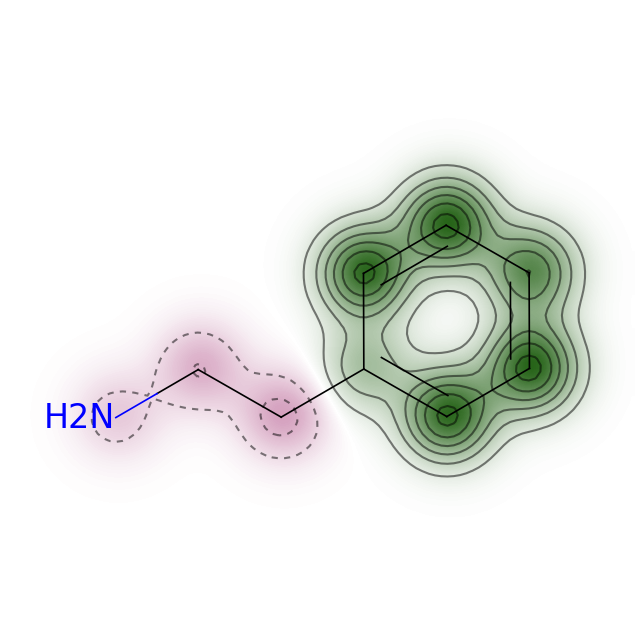

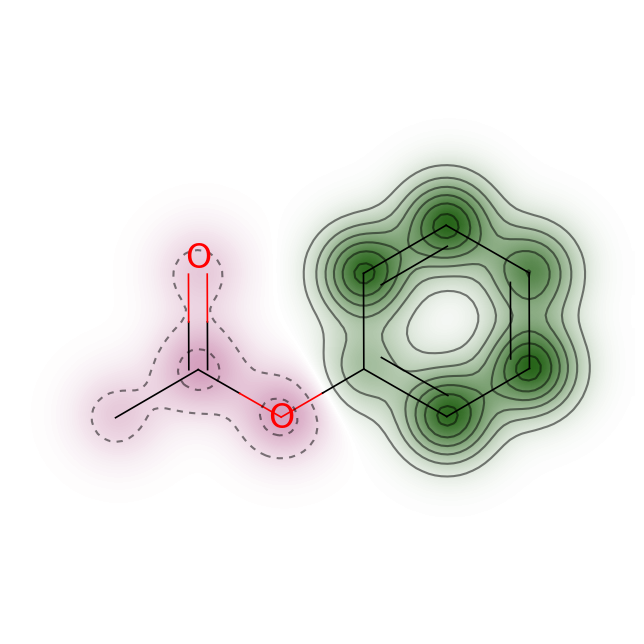

In [64]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_this_mol_obj,my_that_mol_obj, SimilarityMaps.GetMorganFingerprint)
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_that_mol_obj,my_this_mol_obj, SimilarityMaps.GetMorganFingerprint)

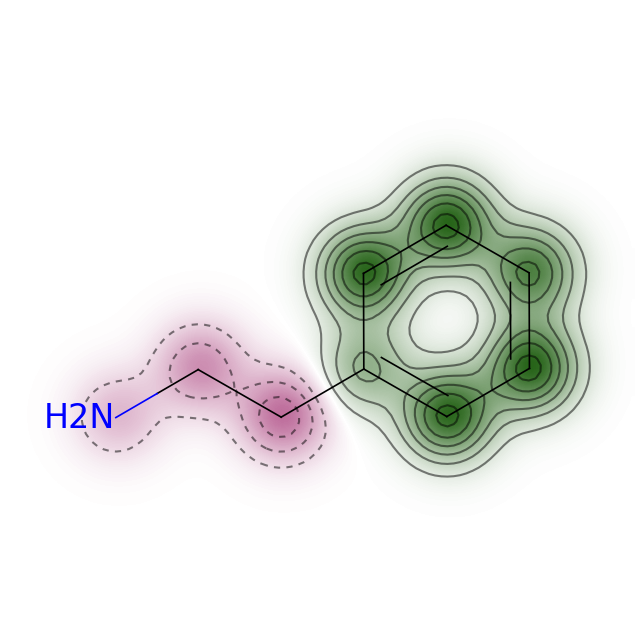

In [70]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_this_mol_obj, my_that_mol_obj,
                                                               lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=5, fpType='bv'),
                                                               metric=DataStructs.TanimotoSimilarity)


In [74]:
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import SVG

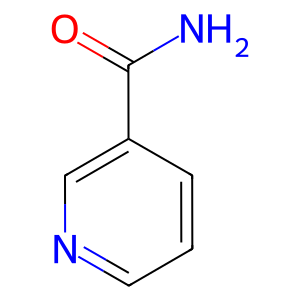

In [75]:
niacinamide = Chem.MolFromSmiles("c1cc(cnc1)C(=O)N")
rdCoordGen.AddCoords(niacinamide)
niacinamide

In [76]:
info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(niacinamide, radius=2, bitInfo=info)

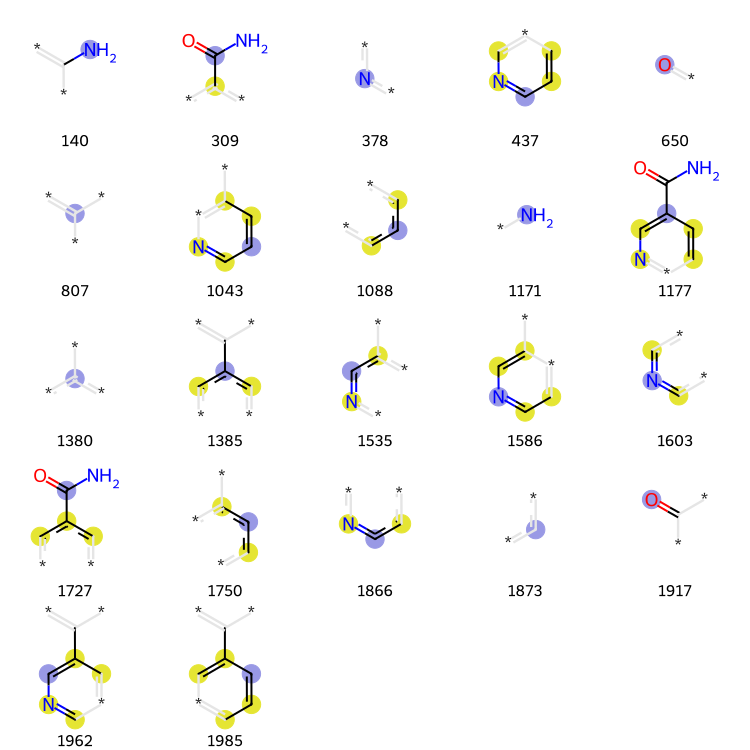

In [77]:
on_bits = [(niacinamide, i, info) for i in fp.GetOnBits()]
labels = [str(i[1]) for i in on_bits]
Draw.DrawMorganBits(on_bits, molsPerRow=5, legends=labels)  # Draw the on bits